### Active Learning and Passive Learning using Support Vector Machines



In this project , I have studied various methods for classification of data on the Bank Note Authentication Data Set. This is a binary classification problem. <br>

The methods are listed below: <br>
1) Active Learning using Support Vector Machines <br>
--Used an L-1 penalized SVM for classification <br>
2) Passive Learning using Support Vector Machines <br>
--Used an L-1 penalized SVM for classification <br>

<b>Banknote authentication Data Set </b> <br>
Data were extracted from images that were taken for 
the evaluation of an authentication procedure for banknotes.

The data is downloaded from : 
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Attribute Information: <br>
1. variance of Wavelet Transformed image (continuous)  <br>
2. skewness of Wavelet Transformed image (continuous)  <br>
3. curtosis of Wavelet Transformed image (continuous)  <br>
4. entropy of image (continuous)  <br>
5. class (integer)  <br>


In [25]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter
%matplotlib inline

### Loading the Dataset

In [4]:
data = pd.read_csv('data_banknote_authentication.csv',names=['variance','skewness','kurtosis','entropy','class'])

In [5]:
data.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
X=data.drop('class',axis=1)
Y=data.loc[:,'class']

### Performing Monte-Carlo Simulation -
#### Repeating each of the following two procedures 50 times. We will have 50 errors for 90 SVMs per each procedure.
#### Training a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Selecting the penalty parameter using 10-fold cross validation.We repeat this process by adding 10 other randomly selected data points to the pool, until we use all the 900 points without replacing the samples back into the training set at each step. We will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. We have then implemented passive learning.

### Passive Learning

In [21]:
params = {'C':[0.01,0.1,1,10,100]}
final_result=pd.DataFrame()
avg_error_passive=[]

for p in range(0,50):
    dataset= pd.read_csv('data_banknote_authentication.csv',names=['variance','skewness','kurtosis','entropy','class'])
    full_test_data = dataset.sample(472,random_state=random.randint(0,100))
    test_ind = full_test_data.index
    full_test_data = full_test_data.reset_index(drop=True)
    full_test_data_x = full_test_data.drop('class',axis=1)
    full_test_data_y = full_test_data['class'] 
    train_data = dataset.drop(index=test_ind)

    err=[]
    new_train = pd.DataFrame()
    
    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    y_train_data = train_data['class']
    y_train_data = y_train_data.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)

    for train_index,test_index in str_k.split(X_train_data,y_train_data):
        sample_x,sample_y=X_train_data.iloc[test_index], y_train_data.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']
        
        # Training SVM with randomly selected Datapoints
        l_svc=LinearSVC(penalty='l1',dual=False,max_iter=200000)
        l_svc_passive = GridSearchCV(l_svc, params,cv=10,iid=1)
        l_svc_passive.fit(new_train_x,new_train_y)
        
        pred_y_passive = l_svc_passive.predict(full_test_data_x)
        err.append(1-accuracy_score(full_test_data_y,pred_y_passive))
    
    error_values = pd.Series(err)
    final_result.insert(loc=p, column=p, value=error_values)
    avg_error_passive=final_result.mean(axis=1)

In [23]:
svm_num=range(1,91)
samples_num=list(range(10,910,10))
result=pd.DataFrame({"SVM Number":svm_num,"Number of Samples":samples_num,"AVG Test Error":avg_error_passive})
result

,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.155720
1,2,20,0.043432
2,3,30,0.033898
3,4,40,0.030720
4,5,50,0.020127
5,6,60,0.038136
6,7,70,0.016949
7,8,80,0.019068
8,9,90,0.014831
9,10,100,0.012712


### Performing Monte-Carlo Simulation -
#### Repeating each of the following two procedures 50 times. We will have 50 errors for 90 SVMs per each procedure.
#### Training a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Selecting the penalty parameter using 10-fold cross validation.We choose the 10 closest data points in the training set to the margin of the SVM and adding them to the pool without replacing the samples back into the training set at each step. Repeat this process until all training data is used.We will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. We have then implemented active learning

### Active Learning

In [31]:
for i in range(0,1):
    data = pd.read_csv('data_banknote_authentication.csv',names=['variance','skewness','curtosis','entropy','class'])
    X=data.drop('class',axis=1)
    Y=data.loc[:,'class']
    s_split=StratifiedShuffleSplit(n_splits=5, test_size=472,random_state=0)
    for train_index, test_index in s_split.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    X_train=X_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    new_train = pd.DataFrame()
    test_errs = []
    full_train_data = pd.concat([X_train,y_train],axis=1)
    
    tr_sample = full_train_data.sample(n=10,replace=False)
         
    new_train = pd.concat([new_train,tr_sample], axis = 0)
   
    full_train_data.drop(index=tr_sample.index.tolist(),inplace=True)
    
    new_train_x= new_train.loc[:,new_train.columns[new_train.columns != 'class']]
    new_train_y= new_train.loc[:,'class']


In [35]:
params = {'C':[0.01,0.1,1,10,100,1000]}
avg_test_error1 = [[0 for x in range(0,50)] for y in range(0,90)] 
best_c1=[[0 for x in range(0,50)] for y in range(0,90)] 
final = pd.DataFrame()

for p in range(0,50):
    dataset= pd.read_csv('data_banknote_authentication.csv',names=['variance','skewness','kurtosis','entropy','class'])
    full_test_data = dataset.sample(472,random_state=random.randint(0,100))
    test_ind = full_test_data.index
    train_data = data.drop(index=test_ind)
    full_test_data = full_test_data.reset_index(drop=True)
    full_test_data_x = full_test_data.drop('class',axis=1)
    full_test_data_y = full_test_data['class'] 

    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)
 
    new_train=pd.DataFrame()
      
    for train_index,test_index in str_k.split(X_train_data,train_data_y):
        sample_x,sample_y=X_train_data.iloc[test_index], train_data_y.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        break
        
    for i in range(0,90):
        X_train_data= X_train_data.reset_index(drop=True)
        
        l1_svc=LinearSVC(penalty='l1',dual=False,max_iter=200000)
        l_svc_active = GridSearchCV(l1_svc, params,cv=10,iid=1)
        l_svc_active.fit(new_train_x,new_train_y)
        
        closest_pts = (l_svc_active.decision_function(X_train_data))
        closest_pts=np.abs(closest_pts)
        distances =  pd.DataFrame(closest_pts)
        distances = distances.sort_values(0)
        distances = distances.iloc[0:10,]
        distances_index = distances.index
        
        tr_sample  =  train_data.iloc[distances_index,:]
        X_train_data= X_train_data.drop(index = distances_index)

        pred_y = l_svc_active.predict(full_test_data_x)
        
        new_train = pd.concat([new_train,tr_sample],axis=0)
        new_train.reset_index(drop=True,inplace=True)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']
  
        avg_test_error1[i][p]=1-accuracy_score(full_test_data_y,pred_y)



In [41]:
from statistics import mean
from collections import Counter

svm_test_errors1=[]
final_best_c1=[]

for j in range(0,90):
    svm_test_errors1.append(np.round(mean(avg_test_error1[j]),3))
    cntr = Counter(best_c1[j])
    value, count = cntr.most_common()[0]
    final_best_c1.append(value)

In [109]:
svm_num=range(1,91)
samples_num=list(range(10,910,10))
result1=pd.DataFrame({"SVM Number":svm_num,"Number of Samples":samples_num,"AVG Test Error":svm_test_errors1})

In [110]:
result1

,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.1340
1,2,20,0.0520
2,3,30,0.0180
3,4,40,0.0187
4,5,50,0.0177
5,6,60,0.0207
6,7,70,0.0137
7,8,80,0.0107
8,9,90,0.0117
9,10,100,0.0117


### Learning Curve by Monte-Carlo Simulation

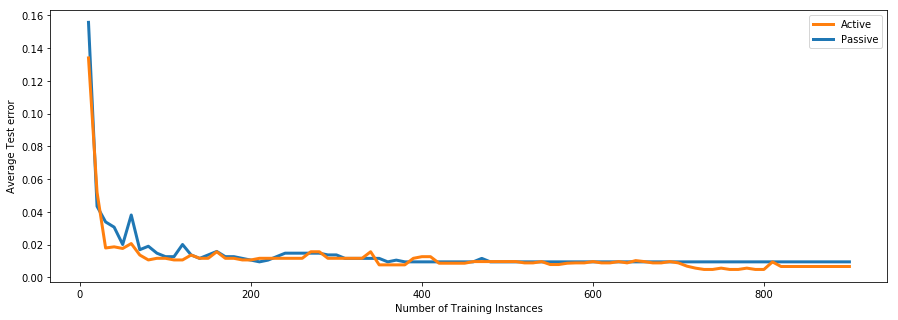

In [113]:
plt.figure(figsize=(15, 5))
passive,=plt.plot(samples_num, avg_error_passive,label='Passive',linewidth=3)
active,=plt.plot(samples_num, svm_test_errors1,label='Active',linewidth=3)
plt.legend(handles=[active,passive])
plt.ylabel('Average Test error')
plt.xlabel('Number of Training Instances')
plt.show()

#### Hence, we can say that Active learning reaches minimum error faster then Passive Learning.